In [ ]:
# 런타임 유형변경 - GPU

In [ ]:
# 서버 접근
!git clone https://github.com/syncdoth/Eagle-Eye-Pneumonia-Detection.git
!bash Eagle-Eye-Pneumonia-Detection/utils/connect_in_colab.sh

Cloning into 'Eagle-Eye-Pneumonia-Detection'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 304 (delta 69), reused 96 (delta 44), pack-reused 175
Receiving objects: 100% (304/304), 365.57 KiB | 4.20 MiB/s, done.
Resolving deltas: 100% (146/146), done.
The following NEW packages will be installed:
  sshpass
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.5 kB of archives.
After this operation, 30.7 kB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigu

In [ ]:
# keras-retinanet : tensorflow-gpu == 2.3.0  kera==2.4 버전 사용
!pip install tensorflow-gpu==2.3.0 

import tensorflow as tf
import keras
!pip install numpy==1.19.2

print(tf.__version__)
print(keras.__version__)
print(np.__version__)

  Using cached https://files.pythonhosted.org/packages/d6/c6/58e517e8b1fb192725cfa23c01c2e60e4e6699314ee9684a1c5f5c9b27e1/numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


  Using cached https://files.pythonhosted.org/packages/9b/04/c3846024ddc7514cde17087f62f0502abf85c53e8f69f6312c70db6d144e/numpy-1.19.2-cp37-cp37m-manylinux2010_x86_64.whl
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.
ERROR: tensorflow-gpu 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


2.3.0
2.4.3


NameError: ignored

In [ ]:
%cd /content/data_server/keras-retinanet
# !pip install . --user
# !python setup.py build_ext --inplace

/content/data_server/keras-retinanet
Processing /content/data_server/keras-retinanet
ERROR: Operation cancelled by user
running build_ext
interrupted


In [ ]:
'''
# 원한다면, colab 버전은 아래 명령어로 mappingclass.csv를 작성할 수 있습니다.
default_dir = '/content/data_server'
classes_path = os.path.join(default_dir, 'class/meta/mappingclass_test.csv')
with open(classes_path, "w") as f:
    f.write("Normal, 0")

# colab 버전은 raccoon_class.txt에 제대로 기재되었나 확인. 
!cat /content/data_server/class/meta/mappingclass_test.csv
'''

#### train.py의 여러 모듈을 직접 import하여 학습 수행. 
* train.py의 여러 모듈을 직접 import하여 customization으로 학습을 수행하는 것이 더 직관적이고 빠른 학습 시간 보장. - 단 코랩은 느림.
* keras-retinanet으로 학습 시 어떻게 내부 모듈이 동작하는지 더 명확히 알 수 있음. 
* 환경 파라미터를 훨씬 편하게 조정 가능

In [ ]:
%cd /content/data_server/keras-retinanet
# !python setup.py build_ext --inplace
'''
# "에러" ModuleNotFoundError: No module named 'keras_retinanet.utils.compute_overlap
%cd /content/data_server/keras-retinanet
!python setup.py build_ext --inplace
'''
import os
from pathlib import Path

HOME_DIR = '/content'
ANNO_DIR = os.path.join(HOME_DIR, 'data_server')
ANNO_MAP_DIR = os.path.join(HOME_DIR, 'data_server/class/meta')
IMAGE_DIR = os.path.join(HOME_DIR, 'data_server/class')

import cv2
from os import listdir, walk
import numpy as np
import math
import tensorflow as tf
from os.path import join
from keras_retinanet.bin.train import create_generators,create_models,create_callbacks
from keras_retinanet.models import backbone,load_model,convert_model
from keras_retinanet.utils.config import read_config_file,parse_anchor_parameters
from keras_retinanet.utils.visualization import draw_boxes

#from imgaug import augmenters as iaa

# tf.set_random_seed(31) # SEEDS MAKE RESULTS MORE REPRODUCABLE
tf.random.set_seed(31)
np.random.seed(17)

/content/data_server/keras-retinanet
running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
building 'keras_retinanet.utils.compute_overlap' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.o
/tmp/ccAHprLS.s: Assembler messages:
/tmp/ccAHprLS.s: Fatal error: can't close build/temp.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.o: Input/output error
error: command 'x86_64-linux-gnu-gcc' failed with exit statu

ImportError: ignored

#### 환경 파라미터 설정. 

In [ ]:
%cd /content/
!pip install keras_resnet

############################
# annotation 파일 이름(csv)
anno_csv = 'meta_ver2_train_colab.csv' # unclass-PN
#############################

import csv
file = open(os.path.join(ANNO_DIR, anno_csv))
reader = csv.reader(file)
lines = len(list(reader))

###############################
#  backbone 바꾸기
b = backbone('resnet50') 
################################
files = os.listdir(ANNO_DIR)
train_file_cnt = lines

%cd /content/data_server/keras-retinanet
class args:
    batch_size = 4
    config = None
    random_transform = True # Image augmentation
    annotations = os.path.join(ANNO_DIR, anno_csv)
    val_annotations = None
    # val_annotations = os.path.join(ANNO_DIR, 'raccoon_anno_retina_valid.csv')
    
    classes = os.path.join(ANNO_MAP_DIR, 'mappingclass.csv')
    image_min_side = 800
    image_max_side = 1333
    no_resize=None
    dataset_type = 'csv'
    tensorboard_dir = ''
    evaluation = False
    snapshots = True

    #########################주의
    snapshot_path = '/content/data_server/keras-retinanet/snapshots/colab_unclassPN_res50' # checkpoint : 저장할 모델 경로
    #########################
    
    #########################
    # backbone 수정부분
    backbone = 'resnet50'
    #########################
    
    epochs = 20
    steps = 1250
    # steps = train_file_cnt//(batch_size)
    '''
    Epoch 1/20
    1257/2000 [=================>............] - ETA: 48:59 - loss: 15.2718 - regression_loss: 2.2976 - classification_loss: 12.9742
    WARNING:tensorflow:Your input ran out of data; interrupting training. 
    Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 40000 batches). 
    You may need to use the repeat() function when building your dataset.
    '''
    

    weighted_average = True
    # keras-retinanet 내부 버전 update로 추가 2020.07.31
    reduce_lr_patience = 2 # 10
    reduce_lr_factor = 0.1
    group_method='ratio'

/content
/content/data_server/keras-retinanet


#### 학습과 검증을 위한 generator 생성.

In [ ]:
# train용 generator 생성 
# 코랩 꽤 오래걸림 - 9600개 가량 데이터 42분
train_gen,valid_gen = create_generators(args,b.preprocess_image)

# retinanet 기반 네트웍 모델 설정. weight값을 아직 설정하지 않았으며, args config 설정. 
# model, training_model, prediction_model이 반환되나 이중 training_model만 사용
model, training_model, prediction_model = create_models(
            backbone_retinanet=b.retinanet,
            num_classes=train_gen.num_classes(),
            weights=None,
            multi_gpu=False,
            freeze_backbone=True,
            lr=1e-3,
            config=args.config)

# callback 생성. epoch시 마다 발생하는 ModelCheckpoint, ReduceLROnPlateur callback 설정. 
callbacks = create_callbacks(model, training_model, prediction_model, valid_gen,args)

In [ ]:
'''
# coco모델 다운받기

# 아래 모델은 https://github.com/fizyr/keras-retinanet/releases 에서 download 받을 수 있음. 
# 해당 모델 h5 파일을 snapshot 디렉토리에 저장 후 retina model의 load_model()을 이용하여 모델 로딩.
%cd  /content/data_server/keras-retinanet/snapshots
!wget https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5 
'''

#### 학습 모델에 coco로 pretrained된 weight를 최초 weight로 설정

In [ ]:
# 코랩 버전은 절대 경로로 수정. 
# resnet50을 사용하지 않는다면, 아래 pretrained 모델은 맞는 모델로 다시 다운받거나,,
'''
default_pretrain_dir='/content/data_server'
training_model.load_weights(os.path.join(default_pretrain_dir, 'keras-retinanet/snapshots/resnet50_coco_best_v2.1.0.h5'),skip_mismatch=True,by_name=True)
'''


#### 실제 학습 진행 되는 부분

In [ ]:
# 실제 학습 진행 부분
training_model.fit_generator(generator=train_gen,
        steps_per_epoch=args.steps,
        epochs=args.epochs,
        verbose=1,
        validation_data=valid_gen,                     
        callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1250/1250 [==============================] - ETA: 0s - loss: 6.0014 - regression_loss: 2.2740 - classification_loss: 3.7274
Epoch 00001: saving model to /content/data_server/keras-retinanet/snapshots/colab_unclassPN_res50/resnet50_csv_01.h5
1250/1250 [==============================] - 6942s 6s/step - loss: 6.0014 - regression_loss: 2.2740 - classification_loss: 3.7274
Epoch 2/20
1250/1250 [==============================] - ETA: 0s - loss: 2.7577 - regression_loss: 2.2193 - classification_loss: 0.5385
Epoch 00002: saving model to /content/data_server/keras-retinanet/snapshots/colab_unclassPN_res50/resnet50_csv_02.h5
1250/1250 [==============================] - 3517s 3s/step - loss: 2.7577 - regression_loss: 2.2193 - classification_loss: 0.5385
Epoch 3/20
1250/1250 [==============================] - ETA: 0s - loss: 2.6744 - regression_loss: 2.1890 - classification_loss: 0.4854
Epoch 00003: saving model

KeyboardInterrupt: ignored

## 학습 모델 Inference 모델로 변환
*  keras_retinanet/bin/convert_model.py를 이용하여 snapshots 디렉토리에 가장 마지막에 만들어진 학습 모델(가장 손실율이 적은)을 infererence용 모델로 변환

In [ ]:
!ls /content/data_server/keras-retinanet/snapshots/colab_test

In [ ]:
%cd /content/data_server/keras-retinanet

In [ ]:
# 모델 inference모델로 전환
# 좀 걸림 ..

%cd /content/data_server/keras-retinanet
!python setup.py build_ext --inplace
!chmod +x /content/data_server/keras-retinanet/keras_retinanet/bin/convert_model.py
!/content/data_server/keras-retinanet/keras_retinanet/bin/convert_model.py /content/data_server/keras-retinanet/snapshots/colab_unclassPN_res50/resnet50_csv_04.h5 \
/content/data_server/keras-retinanet/snapshots/colab_unclassPN_res50/unclassified_PN_04_inference.h5

# 에러 : ModuleNotFoundError: No module named 'keras_retinanet.utils.compute_overlap'
#-> 다음 명령어 터미널 창에서 실행
'''
1.$ source ~/.bashrc
2.$ conda activate keras_base
3.$ cd duhyeuk/keras-retinanet/keras_retinanet/bin
5.$ python convert_model.py /home/server/duhyeuk/keras-retinanet/snapshots/colab_unclassPN_res50/resnet50_csv_04.h5 /home/server/duhyeuk/keras-retinanet/snapshots/colab_test/unclassified_PN_04_inference.h5
'''

/content/data_server/keras-retinanet
running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils
2021-04-04 17:35:00.329125: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-04-04 17:35:04.063323: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-04-04 17:35:04.067541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-04 17:35:04.067985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 d

'\n1.$ source ~/.bashrc\n2.$ conda activate keras_base\n3.$ cd duhyeuk/keras-retinanet/keras_retinanet/bin\n5.$ python convert_model.py /home/server/duhyeuk/keras-retinanet/snapshots/colab_unclassPN_res50/resnet50_csv_04.h5 /home/server/duhyeuk/keras-retinanet/snapshots/colab_test/unclassified_PN_04_inference.h5\n'

#### 변환된 inference용 모델인 unclassified_PN_04_inference.h5 파일을 로드하여 이미지 Detection 수행

In [ ]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time


from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
#from keras_retinanet.utils.gpu import setup_gpu

# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
#setup_gpu(gpu)

In [ ]:
# infer 모델 로드하기
# 좀 걸림
import os
import sys

# 코랩 버전은 절대 경로 추가. 
ROOT_DIR = '/content/data_server'

model_path = os.path.join(ROOT_DIR, 'keras-retinanet/snapshots/colab_unclassPN_res50/unclassified_PN_04_inference.h5')

print(model_path)
# load retinanet model
unclassified_PN_model = models.load_model(model_path, backbone_name='resnet50')

/content/data_server/keras-retinanet/snapshots/colab_unclassPN_res50/unclassified_PN_04_inference.h5


#### 이미지 detect를 위한 함수 생성. 
* inference를 수행하기 전에 이미지 scaling 및 크기를 재 조정할 수 있도록 preprocess_image()와 resize_image() 제공. 
* keras-retinanet은 이미지에 bounding box를 편리하게 그릴 수 있는 API제공. draw_box(), draw_caption(), label_color() 제공

In [ ]:
import cv2
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

labels_to_names_seq = {0:'Unclassified-PN'}

def get_detected_image_retina(model, img_array, use_copied_array, is_print=True):
    
    # copy to draw on
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    img_array = preprocess_image(img_array)
    img_array, scale = resize_image(img_array)
    
    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(img_array, axis=0))
    if is_print:
        print("object detection 처리 시간: ", round(time.time() - start,5))
    
    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.2:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw_img, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names_seq[label], score)
        draw_caption(draw_img, b, caption)
    
    if is_print:
        print("이미지 processing 시간: ", round(time.time() - start,5))
    
    return draw_img

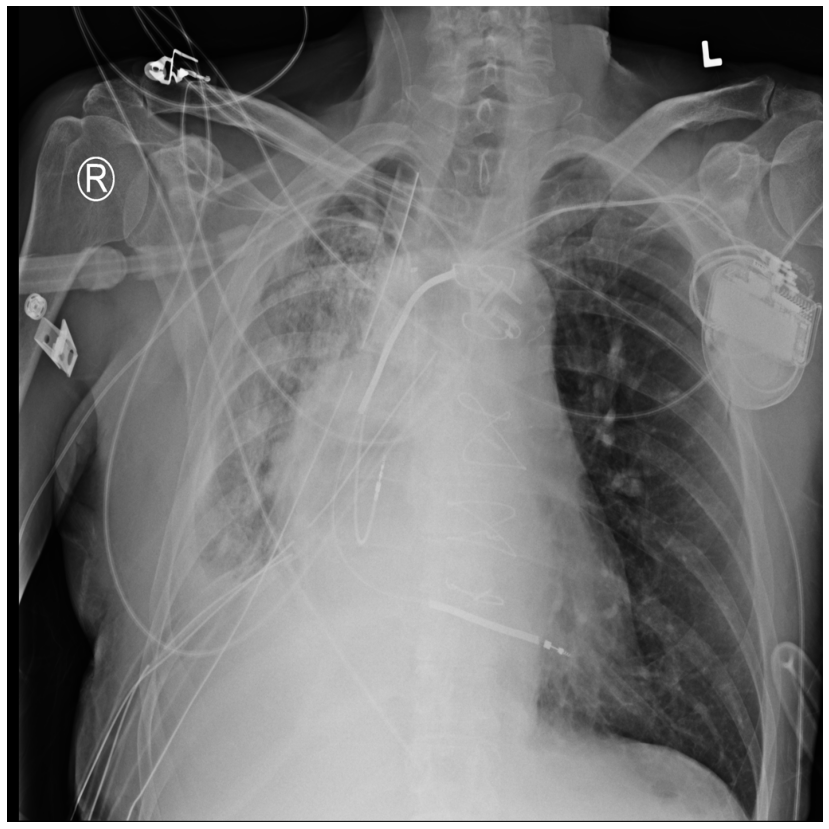

object detection 처리 시간:  0.07721
이미지 processing 시간:  0.07911


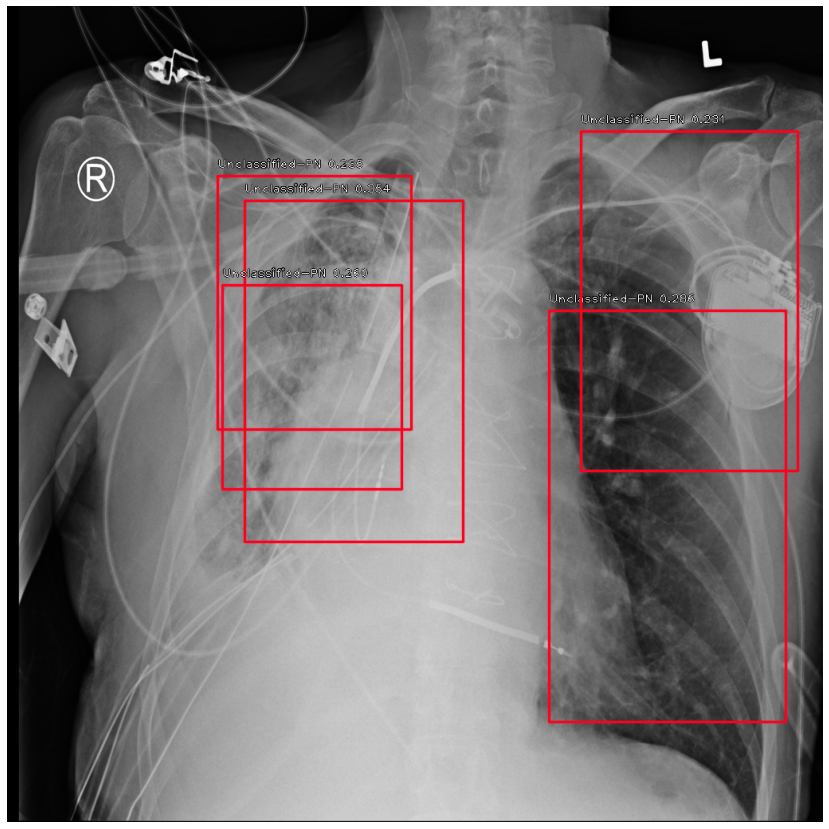

In [ ]:
import os
import cv2
from pathlib import Path

#HOME_DIR = str(Path.home())
# 코랩 버전 수정
HOME_DIR = '/content'
ANNO_DIR = os.path.join(HOME_DIR, 'data_server')
IMAGE_DIR = os.path.join(HOME_DIR, 'data_server/class')

# 원본 이미지
img_array  = cv2.imread(os.path.join(IMAGE_DIR, 'unclassified-PN/NIH/00000013_010.png'))
draw_img_array = img_array.copy()
draw_img_array = cv2.cvtColor(draw_img_array, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw_img_array)
plt.show()

# 이미지 + bbox 이미지
detected_image = get_detected_image_retina(unclassified_PN_model, img_array, use_copied_array=True, is_print=True)
img_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(img_rgb)
plt.show()

#### 데이터 세트 학습 모델의 Object Detection 성능 평가

In [ ]:
%cd /content/data_server/keras-retinanet

'''
# keras_resnet 에러 뜰때
# %cd /content/
# !pip install keras_resnet  
'''

# import keras
import keras

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time


from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
#from keras_retinanet.utils.gpu import setup_gpu

# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
#setup_gpu(gpu)


# infer 모델 로드하기
import os
import sys

# 코랩 버전은 절대 경로 추가. 
ROOT_DIR = '/content/data_server/keras-retinanet'

################################## 인퍼런스 모델
model_path = os.path.join(ROOT_DIR, 'snapshots/colab_unclassPN_res50/unclassified_PN_04_inference.h5')
#################################

print(model_path)
%cd /content/data_server/keras-retinanet
!python setup.py build_ext --inplace
# load retinanet model
#####################################
unclassified_PN_model = models.load_model(model_path, backbone_name='resnet50') 
##################################

In [ ]:
from keras_retinanet.bin.evaluate import create_generator as eval_create_generator

In [ ]:
import os
from pathlib import Path

#HOME_DIR = str(Path.home())
# 코랩 버전 수정
HOME_DIR = '/content'
ANNO_DIR = os.path.join(HOME_DIR, 'data_server')
ANNO_MAP_DIR = os.path.join(HOME_DIR, 'data_server/class/meta')

class args:
    dataset_type='csv'
    score_threshold=0.05 # confidence score
    iou_threshold=0.5    # iou_threshold
    max_detections=100
    image_min_side=800
    image_max_side=1333
    config=None
    no_resize=None
    group_method='ratio'
    ######################################################
    annotations=os.path.join(ANNO_DIR, 'meta_ver2_test_colab.csv')
    classes=os.path.join(ANNO_MAP_DIR, 'mappingclass.csv')
    ###################################################

In [ ]:
generator = eval_create_generator(args, b.preprocess_image)
# args를 설정해서 genrator 를 불러오는게 중요
# generator 생성부분은 엄청 오래걸림.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-9896ce89480a>", line 1, in <module>
    generator = eval_create_generator(args, b.preprocess_image)
  File "/content/data_server/keras-retinanet/keras_retinanet/bin/evaluate.py", line 73, in create_generator
    **common_args
  File "/content/data_server/keras-retinanet/keras_retinanet/preprocessing/csv_generator.py", line 161, in __init__
    super(CSVGenerator, self).__init__(**kwargs)
  File "/content/data_server/keras-retinanet/keras_retinanet/preprocessing/generator.py", line 89, in __init__
    self.group_images()
  File "/content/data_server/keras-retinanet/keras_retinanet/preprocessing/generator.py", line 291, in group_images
    order.sort(key=lambda x: self.image_aspect_ratio(x))
  File "/content/data_server/keras-retinanet/keras_retinanet/preprocessing/genera

KeyboardInterrupt: ignored

In [ ]:
from keras_retinanet.utils.eval import evaluate

# 여러 obj들의 average precision이 튀어나온다
average_precisions, inference_time = evaluate(
            generator,
            unclassified_PN_model,
            iou_threshold=args.iou_threshold,
            score_threshold=args.score_threshold,
            max_detections=args.max_detections,
            save_path=None
        )
# average_precisions는 클래스별로 AP를 가지고 있다

In [ ]:
# print evaluation
total_instances = []
precisions = []
# 레이블(클래스 이름), 해당 클래스 AP, 인스턴스는 몇개인지
for label, (average_precision, num_annotations) in average_precisions.items():
    print('{:.0f} instances of class'.format(num_annotations),
          generator.label_to_name(label), 'with average precision: {:.4f}'.format(average_precision))
    total_instances.append(num_annotations) # 모든 obj의 개수 -> 모든 obj의 AP의 평균계산위해
    precisions.append(average_precision)

if sum(total_instances) == 0:
    print('No test instances found.')

print('Inference time for {:.0f} images: {:.4f}'.format(generator.size(), inference_time))

print('mAP using the weighted average of precisions among classes: {:.4f}'.format(sum([a * b for a, b in zip(total_instances, precisions)]) / sum(total_instances)))
print('mAP: {:.4f}'.format(sum(precisions) / sum(x > 0 for x in total_instances)))